In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
fail_threshold = 0.0033
deep_dchi2 = 100
mindepth = 120

total number, total deep, min depth for deep
182043 27012 9356.199974060059
number of unique targets is 26051
34350
number, fraction of failures, fraction of failures with zwarn==0
25742 0.1468417372387538 0.08309377670732655


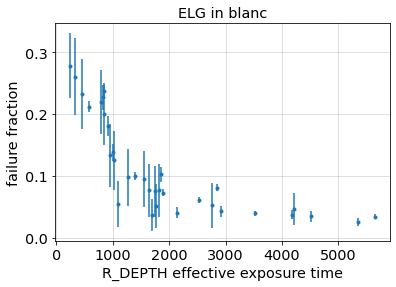

In [7]:
tp = 'ELG'
release = 'blanc'

f = fitsio.read('/project/projectdirs/desi/users/ajross/catalogs/SV/redshift_comps/'+release+'/v0/'+tp+'/alltiles_'+tp+'zinfo.fits') #fitsio *much* faster than using Table here
deep = f[f['subset']=='deep'] 
min_depth = np.max(deep['R_DEPTH'])/2

print('total number, total deep, min depth for deep')
print(len(f),len(deep),min_depth)
#get list of truez in appropriate rows, matching Rongpu's definition for criteria required to allow truth determination
#rows without truth have z==0
mzl = np.zeros(len(f))
tids = np.unique(f['TARGETID'])
print('number of unique targets is '+str(len(tids)))
for iid in tids:
    sf = f['TARGETID'] == iid
    fi = f[sf]
    fd = fi[fi['subset']=='deep']
    mask = fd['FIBERSTATUS']==0 # Remove FIBERSTATUS!=0 fibers
    mask &= fd['ZWARN'] & 2**9==0 # Remove "no data" fibers
    mask &= fd['ZWARN']==0
    mask &= fd['R_DEPTH'] > min_depth
    mask &= fd['DELTACHI2'] > deep_dchi2
    if len(fd[mask]) > 0:
        mzl[sf] = fd['Z'][0]

w = mzl != 0
print(len(mzl[w]))
tf = Table(f)
tf['Z_TRUTH'] = mzl
masknight = tf['subset'] != 'deep'
masknight &= tf['subset'] != 'all'
masknight &= tf['Z_TRUTH'] != 0
masknight &= tf['FIBERSTATUS']==0
masknight &= tf['ZWARN'] & 2**9==0
tcomp = tf[masknight]
dz = tcomp['Z'] - tcomp['Z_TRUTH']
bz = abs(dz) > fail_threshold
bzz = bz & (tcomp['ZWARN'] != 0)
print('number, fraction of failures, fraction of failures with zwarn==0')
print(len(tcomp),len(tcomp[bz])/len(tcomp),len(tcomp[bzz])/len(tcomp))
rvals = np.unique(tcomp['R_DEPTH'])
ff = []
rv = []
nb = []
nt = []
for rval in rvals:
    ds = tcomp[tcomp['R_DEPTH']==rval]
    dz = ds['Z'] - ds['Z_TRUTH']
    bz = abs(dz) > fail_threshold
    if len(ds) > 30 and rval > mindepth:
        ff.append(len(ds[bz])/len(ds))
        nb.append(len(ds[bz]))
        nt.append(len(ds))
        rv.append(rval)
nt = np.array(nt)
nb = np.array(nb)
err = ((nt-nb)*(1.-(nt-nb)/nt))**.5/nt #binomial error formula, needs double-check
plt.errorbar(rv,ff,err,fmt='.')#,label=td)

#plt.legend()
plt.grid(alpha=0.5)
plt.xlabel('R_DEPTH effective exposure time')
plt.ylabel('failure fraction')
plt.title(tp+' in '+release)
plt.show()

In [1]:
import evalSR
import importlib

In [111]:
importlib.reload(evalSR)

<module 'evalSR' from '/global/u2/a/ajross/LSS/Sandbox/evalSR.py'>

In [112]:
tf = evalSR.add_truth('LRG')

Using the SV1 LRG_OPT selection
fraction of targets in nominal selection is 0.29569052870000595
number of unique targets is 4116


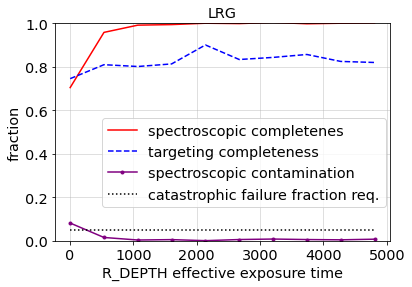

the target redshift range is 0.4<z<1.0
spectroscopic completeness is defined as the fraction of redshifts obained within the target range that have no zwarn flag, divided by the number of true redshifts within the target range (it does not exclude catastrophic failures)
targeting completeness is defined as the fraction of targets with true redshifts within the target range, divided by the total number of targets; variations are only due to variations in target properties in different tiles
spectroscopic contamination is defined as the fraction of redshifts, within the target range and with no zwarn flag, that are further than 0.0033(1+z_truth) from z_truth (cutting to the target redshift range and to zwarn == 0 in both numerator and denominator)


In [113]:
evalSR.effvsdepth(tf,'LRG',nbin=10,lplace=(.12,.12))

In [114]:
tf = evalSR.add_truth('ELG')

Using the SV1 ELG_FDR_GTOT selection
fraction of targets in nominal selection is 0.36318891690424787
number of unique targets is 9504


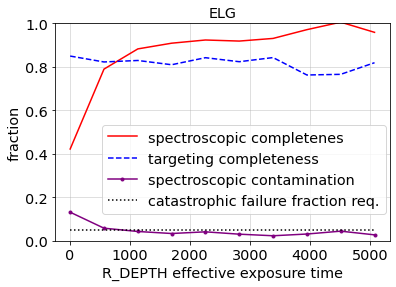

the target redshift range is 0.6<z<1.6
spectroscopic completeness is defined as the fraction of redshifts obained within the target range that have no zwarn flag, divided by the number of true redshifts within the target range (it does not exclude catastrophic failures)
targeting completeness is defined as the fraction of targets with true redshifts within the target range, divided by the total number of targets; variations are only due to variations in target properties in different tiles
spectroscopic contamination is defined as the fraction of redshifts, within the target range and with no zwarn flag, that are further than 0.0033(1+z_truth) from z_truth (cutting to the target redshift range and to zwarn == 0 in both numerator and denominator)


In [115]:
evalSR.effvsdepth(tf,'ELG',nbin=10,lplace=(.12,.09))

In [116]:
tf = evalSR.add_truth('QSO')

Using the SV1 QSO_RF_4PASS selection
fraction of targets in nominal selection is 0.5033272723864509
number of unique targets is 4420


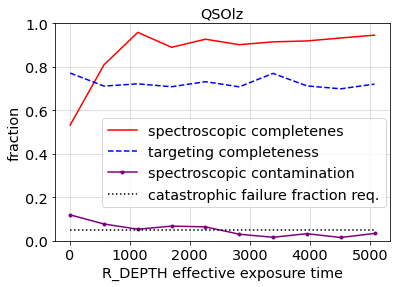

the target redshift range is 0.6<z<2.1
spectroscopic completeness is defined as the fraction of redshifts obained within the target range that have no zwarn flag, divided by the number of true redshifts within the target range (it does not exclude catastrophic failures)
targeting completeness is defined as the fraction of targets with true redshifts within the target range, divided by the total number of targets; variations are only due to variations in target properties in different tiles
spectroscopic contamination is defined as the fraction of redshifts, within the target range and with no zwarn flag, that are further than 0.0033(1+z_truth) from z_truth (cutting to the target redshift range and to zwarn == 0 in both numerator and denominator)


In [117]:
evalSR.effvsdepth(tf,'QSOlz',nbin=10,lplace=(.12,.12))

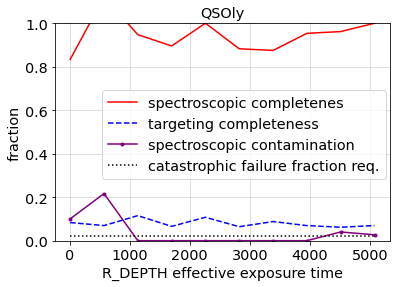

the target redshift range is 2.1<z<4.5
spectroscopic completeness is defined as the fraction of redshifts obained within the target range that have no zwarn flag, divided by the number of true redshifts within the target range (it does not exclude catastrophic failures)
targeting completeness is defined as the fraction of targets with true redshifts within the target range, divided by the total number of targets; variations are only due to variations in target properties in different tiles
spectroscopic contamination is defined as the fraction of redshifts, within the target range and with no zwarn flag, that are further than 0.0033(1+z_truth) from z_truth (cutting to the target redshift range and to zwarn == 0 in both numerator and denominator)


In [118]:
evalSR.effvsdepth(tf,'QSOly',nbin=10,lplace=(.12,.25))

In [119]:
tf = evalSR.add_truth('BGS_ANY')

Using the SV1 BGS_ANY selection
fraction of targets in nominal selection is 1.0
number of unique targets is 27272


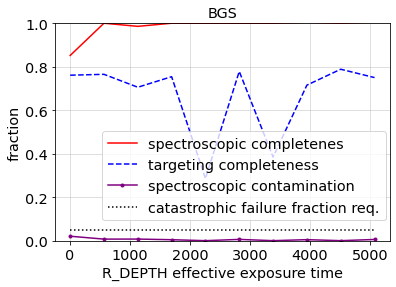

the target redshift range is 0.01<z<0.5
spectroscopic completeness is defined as the fraction of redshifts obained within the target range that have no zwarn flag, divided by the number of true redshifts within the target range (it does not exclude catastrophic failures)
targeting completeness is defined as the fraction of targets with true redshifts within the target range, divided by the total number of targets; variations are only due to variations in target properties in different tiles
spectroscopic contamination is defined as the fraction of redshifts, within the target range and with no zwarn flag, that are further than 0.0033(1+z_truth) from z_truth (cutting to the target redshift range and to zwarn == 0 in both numerator and denominator)


In [120]:
evalSR.effvsdepth(tf,'BGS',nbin=10,lplace=(.12,.06))